# Final Project 
## Author - Sakshi Bansal

In [4]:
# Importing all the required modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import string

### Data Aquisition

In [5]:
data = pd.read_csv("/Users/sakshibansal/Downloads/car_reviews_large.csv")

### Descriptive Analysis

In [6]:
data.head()

,reviewid,make,model,year,title,author,perform_rating,comfort_rating,fuel_econ_rating,fun_rating,...,exterior_rating,build_qual_rating,reliab_rating,text,fav_feat,sugg_imp,cnt_thumbs_down,cnt_thumbs_up,comment_cnt,Avg_MSRP
0,1,ACURA,ILX,2017,A new Dud,Laurel Blue,0,0,0,0,...,0,0,0,I just leased a new 2017 Acura ILX two months ...,NaN,NaN,0,0,0.0,31203.33333
1,2,ACURA,ILX,2015,Noisy as heck !,Seth L,0,0,0,0,...,0,0,0,"Transmission hums all the time. Acura claims, ...",NaN,NaN,1,2,0.0,29375.00000
2,3,ACURA,ILX,2015,Great entry level luxury car,NicBran,0,0,0,0,...,0,0,0,"Before purchasing this car, I had a Mazda RX-8...",NaN,NaN,0,5,0.0,29375.00000
3,4,ACURA,ILX,2015,Amazing Car!,robin707,5,5,4,5,...,5,5,5,I just purchased the 2015 ILX 2.4 6 speed manu...,"Interior is amazing and so comfortable, the tr...","I'm not sure, maybe GPS and a little bit bette...",0,3,0.0,29375.00000
4,5,ACURA,ILX,2015,My ILX is a great car,stevenrose,5,5,5,5,...,5,5,5,I really enjoy owning my ILX. The ILX offers ...,Why is the ILX not just a Civic EX-L?\r\r\r\n\...,Road noise and the suspension can be a bit sti...,0,18,0.0,29375.00000


In [7]:
data.columns

Index(['reviewid', 'make', 'model', 'year', 'title', 'author',
       'perform_rating', 'comfort_rating', 'fuel_econ_rating', 'fun_rating',
       'interior_rating', 'exterior_rating', 'build_qual_rating',
       'reliab_rating', 'text', 'fav_feat', 'sugg_imp', 'cnt_thumbs_down',
       'cnt_thumbs_up', 'comment_cnt', 'Avg_MSRP'],
      dtype='object')

In [8]:
data.shape

(110121, 21)

In [9]:
data.dtypes

reviewid               int64
make                  object
model                 object
year                   int64
title                 object
author                object
perform_rating         int64
comfort_rating         int64
fuel_econ_rating       int64
fun_rating             int64
interior_rating        int64
exterior_rating        int64
build_qual_rating      int64
reliab_rating          int64
text                  object
fav_feat              object
sugg_imp              object
cnt_thumbs_down        int64
cnt_thumbs_up          int64
comment_cnt          float64
Avg_MSRP             float64
dtype: object

In [10]:
# Total number of cars make in the data
len(data["make"].unique())

55

In [11]:
# Displaying all the car makes in the data
data["make"].unique()

array(['ACURA', 'ALFA-ROMEO', 'ASTON-MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUGATTI', 'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE',
       'FERRARI', 'FIAT', 'FISKER', 'FORD', 'GENESIS', 'GMC', 'HONDA',
       'HUMMER', 'HYUNDAI', 'INFINITI', 'ISUZU', 'JAGUAR', 'JEEP', 'KIA',
       'LAMBORGHINI', 'LAND-ROVER', 'LEXUS', 'LINCOLN', 'LOTUS',
       'MASERATI', 'MAYBACH', 'MAZDA', 'MCLAREN', 'MERCEDES-BENZ',
       'MERCURY', 'MINI', 'MITSUBISHI', 'NISSAN', 'PONTIAC', 'PORSCHE',
       'RAM', 'ROLLS-ROYCE', 'SAAB', 'SATURN', 'SCION', 'SMART', 'SPYKER',
       'SUBARU', 'SUZUKI', 'TESLA', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO'],
      dtype=object)

In [12]:
# Number of reviews grouped by car make
data["make"].value_counts()

make
HONDA            11750
TOYOTA           11462
FORD              8890
CHEVROLET         7850
NISSAN            7727
MAZDA             4898
HYUNDAI           4812
VOLKSWAGEN        4373
SUBARU            4168
DODGE             4019
JEEP              3315
KIA               3081
BMW               3073
ACURA             2809
LEXUS             2549
MERCEDES-BENZ     2227
GMC               2189
AUDI              1950
PONTIAC           1841
INFINITI          1786
CHRYSLER          1606
BUICK             1503
SATURN            1432
CADILLAC          1383
VOLVO             1296
MITSUBISHI        1295
SCION             1151
LINCOLN            895
SUZUKI             787
MERCURY            780
LAND-ROVER         532
MINI               522
JAGUAR             402
PORSCHE            385
FIAT               299
RAM                297
SMART              291
HUMMER             196
MASERATI            67
TESLA               47
SAAB                46
BENTLEY             35
ASTON-MARTIN        17
ISUZU 

In [13]:
# Changing dtypes from text to string
data[["title","text","fav_feat","sugg_imp"]]=data[["title","text","fav_feat","sugg_imp"]].astype('str')

In [14]:
# Calculating mean length of titles, reviews and favourite feats

mean_title=round(data["title"].apply(len).mean())
mean_text=round(data["text"].apply(len).mean())
mean_fav = round(data["fav_feat"].apply(len).mean())
mean_sugg = round(data["sugg_imp"].apply(len).mean())

print("Mean length of title is : ",mean_title)
print("Mean length of text is : ",mean_text)
print("Mean length of favourite feat is : ",mean_fav)
print("Mean length of suggestions is : ",mean_title)

Mean length of title is :  22
Mean length of text is :  552
Mean length of favourite feat is :  108
Mean length of suggestions is :  22


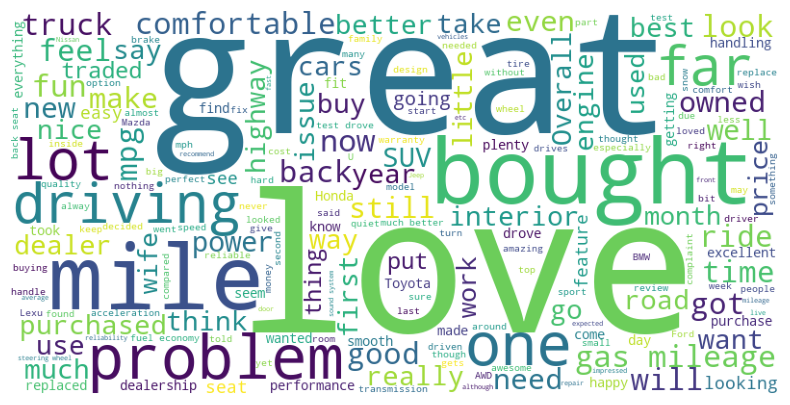

In [15]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
text = " ".join(review for review in data['text'])
additional_stopwords={"car","vehicle","drive"}
# Create and generate a word cloud image
wordcloud = WordCloud(width=800, 
                      height=400, 
                      background_color='white',
                      max_words=200,
                      stopwords=STOPWORDS.union(additional_stopwords)).generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Data Prepration

##### Missing values

In [16]:
#Checking missing values
data.isnull().sum()

reviewid               0
make                   0
model                  0
year                   0
title                  0
author                12
perform_rating         0
comfort_rating         0
fuel_econ_rating       0
fun_rating             0
interior_rating        0
exterior_rating        0
build_qual_rating      0
reliab_rating          0
text                   0
fav_feat               0
sugg_imp               0
cnt_thumbs_down        0
cnt_thumbs_up          0
comment_cnt          266
Avg_MSRP               0
dtype: int64

In [17]:
# Replacing missing values with zero to cnt_comments
data["comment_cnt"] = data["comment_cnt"].fillna(0)
data["comment_cnt"].isnull().sum()

0

##### Duplicate Values

In [18]:
data[data.duplicated()]

,reviewid,make,model,year,title,author,perform_rating,comfort_rating,fuel_econ_rating,fun_rating,...,exterior_rating,build_qual_rating,reliab_rating,text,fav_feat,sugg_imp,cnt_thumbs_down,cnt_thumbs_up,comment_cnt,Avg_MSRP


There are no duplicates in our data.

##### Dropping irrelevant columns

In [19]:
# Dropping reviewid, model and author
data.drop(["reviewid","model","author"],axis=1,inplace=True)

##### Changing data types of columns

In [20]:
data.dtypes

make                  object
year                   int64
title                 object
perform_rating         int64
comfort_rating         int64
fuel_econ_rating       int64
fun_rating             int64
interior_rating        int64
exterior_rating        int64
build_qual_rating      int64
reliab_rating          int64
text                  object
fav_feat              object
sugg_imp              object
cnt_thumbs_down        int64
cnt_thumbs_up          int64
comment_cnt          float64
Avg_MSRP             float64
dtype: object

In [21]:
# Setting category dtype for categorical data columns
data[["year","make","perform_rating","comfort_rating","fuel_econ_rating",
         "fun_rating","interior_rating","exterior_rating","build_qual_rating","reliab_rating"]] =(
data[["year","make","perform_rating","comfort_rating","fuel_econ_rating",
         "fun_rating","interior_rating","exterior_rating","build_qual_rating","reliab_rating"]].astype("category"))

##### Label Encoding make and year column

In [22]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data["make"] = encoder.fit_transform(data["make"])
data["year"] = encoder.fit_transform(data["year"])
#Verifying the change
data[["make","year"]].head()

,make,year
0,0,10
1,0,8
2,0,8
3,0,8
4,0,8


##### Creating a total engagement column

In [23]:
#Creating a total engagement matrix column
data["Total Engagement"] = data["cnt_thumbs_down"] + data["cnt_thumbs_up"]+ data["comment_cnt"]

In [24]:
# Dropping couts of thumbs up, thumbs down and comments
data.drop(["cnt_thumbs_down","cnt_thumbs_up","comment_cnt"],axis=1,inplace=True)

#Verifying changes 
data.head()

,make,year,title,perform_rating,comfort_rating,fuel_econ_rating,fun_rating,interior_rating,exterior_rating,build_qual_rating,reliab_rating,text,fav_feat,sugg_imp,Avg_MSRP,Total Engagement
0,0,10,A new Dud,0,0,0,0,0,0,0,0,I just leased a new 2017 Acura ILX two months ...,nan,nan,31203.33333,0.0
1,0,8,Noisy as heck !,0,0,0,0,0,0,0,0,"Transmission hums all the time. Acura claims, ...",nan,nan,29375.00000,3.0
2,0,8,Great entry level luxury car,0,0,0,0,0,0,0,0,"Before purchasing this car, I had a Mazda RX-8...",nan,nan,29375.00000,5.0
3,0,8,Amazing Car!,5,5,4,5,4,5,5,5,I just purchased the 2015 ILX 2.4 6 speed manu...,"Interior is amazing and so comfortable, the tr...","I'm not sure, maybe GPS and a little bit bette...",29375.00000,3.0
4,0,8,My ILX is a great car,5,5,5,5,5,5,5,5,I really enjoy owning my ILX. The ILX offers ...,Why is the ILX not just a Civic EX-L?\r\r\r\n\...,Road noise and the suspension can be a bit sti...,29375.00000,18.0


#### Sentiment Analysis


In [25]:
#Removing Missing values in text data
data['title'] = data['title'].fillna('').astype(str)
data['text'] = data['text'].fillna('').astype(str)
data['fav_feat'] = data['fav_feat'].fillna('').astype(str)
data['sugg_imp'] = data['sugg_imp'].fillna('').astype(str)

# Importing modules
from textblob import TextBlob

# Maiking sentiment score columns
data["title_sentiment"]=data["title"].apply(lambda txt: TextBlob(txt).sentiment.polarity)
data["text_sentiment"]=data["text"].apply(lambda txt: TextBlob(txt).sentiment.polarity)
data["fav_feat_sentiment"]=data["fav_feat"].apply(lambda txt: TextBlob(txt).sentiment.polarity)
data["sugg_imp__sentiment"]=data["sugg_imp"].apply(lambda txt: TextBlob(txt).sentiment.polarity)

In [26]:
# importing modules
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from nltk.stem.snowball import SnowballStemmer

# Choosing a stop word list and a stemmer
stop_words = set(stopwords.words("English"))
stemmer = SnowballStemmer("english")

# Defining a function to tokenize and clean data
def tokenize_clean(txt):
    tokens = word_tokenize(txt.lower())
    tokens = [t for t in tokens if t not in stop_words and t not in string.punctuation]
    stemmed_tokens = [stemmer.stem(t) for t in tokens]
    return stemmed_tokens

#Using the function
data["title_tokens"]=data["title"].apply(tokenize_clean)
data["text_tokens"]=data["text"].apply(tokenize_clean)
data["fav_feat_tokens"]=data["fav_feat"].apply(tokenize_clean)
data["sugg_imp_tokens"]=data["sugg_imp"].apply(tokenize_clean)


#### Making length of text variables

In [27]:
# Making text length columns
data["title_length"]=data["title"].apply(lambda txt:len(txt))
data["text_length"]=data["text"].apply(lambda txt:len(txt))
data["fav_feat_length"]=data["fav_feat"].apply(lambda txt:len(txt))
data["sugg_imp_length"]=data["sugg_imp"].apply(lambda txt:len(txt))

In [28]:
# Making a combined text column
data["combined_text"] = (data["title_tokens"]+data["text_tokens"]
+data["fav_feat_tokens"]+data["sugg_imp_tokens"])

In [29]:
data["combined_text"] = data["combined_text"].apply(lambda tokens: " ".join(tokens))

#### Removing Irrelevant columns and setting correct dtypes

In [30]:
data.columns

Index(['make', 'year', 'title', 'perform_rating', 'comfort_rating',
       'fuel_econ_rating', 'fun_rating', 'interior_rating', 'exterior_rating',
       'build_qual_rating', 'reliab_rating', 'text', 'fav_feat', 'sugg_imp',
       'Avg_MSRP', 'Total Engagement', 'title_sentiment', 'text_sentiment',
       'fav_feat_sentiment', 'sugg_imp__sentiment', 'title_tokens',
       'text_tokens', 'fav_feat_tokens', 'sugg_imp_tokens', 'title_length',
       'text_length', 'fav_feat_length', 'sugg_imp_length', 'combined_text'],
      dtype='object')

In [31]:
# Dropping irrelevant columns first
data.drop(["title","text","fav_feat","sugg_imp",
             "title_tokens","text_tokens","fav_feat_tokens","sugg_imp_tokens"],axis=1,inplace=True)

In [32]:
# Setting the right data types for all columns
data[["make","year"]] = data[["make","year"]].astype("category")

In [35]:
# Importing modules
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Fitting tokenizer on the text data
tokenizer = Tokenizer(num_words=4000)
tokenizer.fit_on_texts(data["combined_text"])

# Converting text to sequences
sequences= tokenizer.texts_to_sequences(data["combined_text"])

# Printing Maximum length of a sequence
max_length = max(map(len,sequences))
print("Maximum length of sequences :",max_length)

# Padding the sequences
padded_sequences = pad_sequences(sequences,maxlen=max_length,padding="post")

# Converting to df
text_sequence = pd.DataFrame(padded_sequences)
text_sequence.head()

Maximum length of sequences : 980


,0,1,2,3,4,5,6,7,8,9,...,970,971,972,973,974,975,976,977,978,979
0,29,459,29,2036,369,144,90,352,369,63,...,0,0,0,0,0,0,0,0,0,0
1,737,2052,71,2761,36,369,1138,5,472,2196,...,0,0,0,0,0,0,0,0,0,0
2,4,559,481,180,1,67,1,286,1209,254,...,0,0,0,0,0,0,0,0,0,0
3,211,1,67,592,44,52,58,85,175,401,...,0,0,0,0,0,0,0,0,0,0
4,4,1,47,285,89,278,4,174,664,95,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# Droppping combined text and keeping only sequences
data.drop("combined_text",axis=1,inplace=True)
data.columns

Index(['make', 'year', 'perform_rating', 'comfort_rating', 'fuel_econ_rating',
       'fun_rating', 'interior_rating', 'exterior_rating', 'build_qual_rating',
       'reliab_rating', 'Avg_MSRP', 'Total Engagement', 'title_sentiment',
       'text_sentiment', 'fav_feat_sentiment', 'sugg_imp__sentiment',
       'title_length', 'text_length', 'fav_feat_length', 'sugg_imp_length'],
      dtype='object')

In [37]:
# Concating data and sequences
data = pd.concat([data,text_sequence.reset_index(drop=True)],axis=1)
data.head()

,make,year,perform_rating,comfort_rating,fuel_econ_rating,fun_rating,interior_rating,exterior_rating,build_qual_rating,reliab_rating,...,970,971,972,973,974,975,976,977,978,979
0,0,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,8,5,5,4,5,4,5,5,5,...,0,0,0,0,0,0,0,0,0,0
4,0,8,5,5,5,5,5,5,5,5,...,0,0,0,0,0,0,0,0,0,0


## Some more descriptive statistics

In [38]:
import statistics
print("Mean of sentiment score for reviews",round(statistics.mean(data["title_sentiment"]),2))

print("Mean of sentiment score for title",round(statistics.mean(data["title_sentiment"]),2))


Mean of sentiment score for reviews 0.27
Mean of sentiment score for title 0.27


**Titles and Reviews have the same mean sentiment scores**

## Model Building and Prediction

In [39]:
# Normalising numeric data
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
numeric = scaler.fit_transform(data[["Avg_MSRP","Total Engagement","title_length","text_length","fav_feat_length","sugg_imp_length"]])
numeric = pd.DataFrame(numeric,columns=scaler.get_feature_names_out())

In [40]:
numeric.head()

,Avg_MSRP,Total Engagement,title_length,text_length,fav_feat_length,sugg_imp_length
0,0.047813,-0.023688,-1.169195,2.138759,-0.827400,-0.842589
1,-0.041089,-0.022985,-0.610178,-1.126746,-0.827400,-0.842589
2,-0.041089,-0.022516,0.601026,4.908976,-0.827400,-0.842589
3,-0.041089,-0.022985,-0.889686,-0.349823,0.611667,1.161756
4,-0.041089,-0.019470,-0.051161,0.354264,2.255191,1.588053


In [42]:
# One hot encoding categorical data
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
data_processed = encoder.fit_transform(data[["year","perform_rating","comfort_rating",
                                                   "fuel_econ_rating","fun_rating","interior_rating",
                                                  "exterior_rating","build_qual_rating","reliab_rating"]])

# Converting onhotencoded output to dataframe
data_processed = pd.DataFrame(data_processed, columns=encoder.get_feature_names_out())
data_processed.head()

# Dropping original not encoded categorical variables
data.drop(["Avg_MSRP","Total Engagement","title_length","text_length","fav_feat_length","sugg_imp_length",
              "year","perform_rating","comfort_rating",
              "fuel_econ_rating","fun_rating","interior_rating",
              "exterior_rating","build_qual_rating","reliab_rating"],axis=1,inplace=True)
data = pd.concat([data_processed.reset_index(drop=True),numeric,data],axis=1)
data.head()

,year_0,year_1,year_2,year_3,year_4,year_5,year_6,year_7,year_8,year_9,...,970,971,972,973,974,975,976,977,978,979
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# Splitting data into training, validation and testing dataset
from sklearn.model_selection import train_test_split
x=data.drop("Total Engagement",axis=1)
y=data['Total Engagement']

# Making 70% training and 30% remaining
x_train, x_remaining, y_train, y_remaining = train_test_split(x,y,test_size=0.3,random_state=69)

# Splitting the remaining as 30% validation and 10% test
x_val, x_test, y_val, y_test = train_test_split(x_remaining, y_remaining, test_size=1/3, random_state=70)

In [44]:
x_train.shape

(77084, 1049)

In [45]:
x_val.shape

(22024, 1049)

In [46]:
x_test.shape

(11013, 1049)

##### Constructing Dense Network model

In [47]:
# Converting  [make] to int
x_train["make"] = x_train["make"].astype("int")
x_val["make"] = x_val["make"].astype("int")
x_test["make"] = x_test["make"].astype("int")

In [48]:
x_train[numeric.columns.drop("Total Engagement")].shape

(77084, 5)

In [49]:
numeric.columns

Index(['Avg_MSRP', 'Total Engagement', 'title_length', 'text_length',
       'fav_feat_length', 'sugg_imp_length'],
      dtype='object')

In [50]:
data_processed.shape

(110121, 59)

In [51]:
numeric_and_processed_columns=numeric.drop("Total Engagement",axis=1).columns.tolist() + data_processed.columns.tolist()

In [53]:
len(numeric_and_processed_columns)

64

In [56]:
# Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanSquaredError
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Model


# Defining Input layers
input_seq = Input(shape=(max_length,))
input_num = Input(shape=(len(numeric_and_processed_columns),))
input_cat = Input(shape=(1,))

# Embedding for sequences
embedding_seq = Embedding(input_dim=4000, output_dim=64)(input_seq)
flattened_seq = Flatten()(embedding_seq)

# Embedding for categorical data
embedding_cat = Embedding(input_dim=55, output_dim=8)(input_cat)
flattened_cat = Flatten()(embedding_cat)

# Concatenate with other features
concatenated = Concatenate()([flattened_seq, input_num, flattened_cat])

# Add Dense layers
dense_layer = Dense(32, activation='relu')(concatenated)
output = Dense(1, activation='linear')(dense_layer)

# Define the model
model = Model(inputs=[input_seq, input_num, input_cat], outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanSquaredError()])

# Defining call backs
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Printing summary
model.summary()

# Train the model
history=model.fit([x_train[text_sequence.columns], 
           x_train[numeric_and_processed_columns], 
           x_train["make"]], y_train, 
           epochs=30, batch_size=10, 
           validation_data=([x_val[text_sequence.columns], 
                             x_val[numeric_and_processed_columns],
                             x_val["make"]], y_val),
                           callbacks=[model_checkpoint])

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 980)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_8       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_4         │ (None, 980, 64)   │    256,000 │ input_layer_6[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_5         │ (None, 1, 8)      │        440 │ input_layer_8[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_4 (Flatten) │ (None, 62720)     │          0 │ embedding_4[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_7       │ (None, 64)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_5 (Flatten) │ (None, 8)         │          0 │ embedding_5[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 62792)     │          0 │ flatten_4[0][0],  │
│ (Concatenate)       │                   │            │ input_layer_7[0]… │
│                     │                   │            │ flatten_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 32)        │  2,009,376 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │         33 │ dense_4[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,265,849 (8.64 MB)

 Trainable params: 2,265,849 (8.64 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
7709/7709 ━━━━━━━━━━━━━━━━━━━━ 82s 11ms/step - loss: 1.3901 - mean_squared_error: 1.3901 - val_loss: 0.7190 - val_mean_squared_error: 0.7190
Epoch 2/30
7709/7709 ━━━━━━━━━━━━━━━━━━━━ 80s 10ms/step - loss: 1.2441 - mean_squared_error: 1.2441 - val_loss: 0.7191 - val_mean_squared_error: 0.7191
Epoch 3/30
7709/7709 ━━━━━━━━━━━━━━━━━━━━ 81s 10ms/step - loss: 1.1191 - mean_squared_error: 1.1191 - val_loss: 0.7189 - val_mean_squared_error: 0.7189
Epoch 4/30
7709/7709 ━━━━━━━━━━━━━━━━━━━━ 85s 11ms/step - loss: 1.3881 - mean_squared_error: 1.3881 - val_loss: 0.7190 - val_mean_squared_error: 0.7190
Epoch 5/30
7709/7709 ━━━━━━━━━━━━━━━━━━━━ 84s 11ms/step - loss: 1.1253 - mean_squared_error: 1.1253 - val_loss: 0.7189 - val_mean_squared_error: 0.7189
Epoch 6/30
7709/7709 ━━━━━━━━━━━━━━━━━━━━ 82s 11ms/step - loss: 1.0737 - mean_squared_error: 1.0737 - val_loss: 0.7190 - val_mean_squared_error: 0.7190
Epoch 7/30
7709/7709 ━━━━━━━━━━━━━━━━━━━━ 84s 11ms/step - loss: 1.4425 - mean_squared_er

In [58]:
loss, mse = model.evaluate([x_test[text_sequence.columns], 
           x_test[numeric_and_processed_columns], 
           x_test["make"]],y_test)

print("Loss :",round(loss,1))
print("MSE :",round(mse,1))

345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3193 - mean_squared_error: 0.3193
Loss : 0.5
MSE : 0.5


**Plotting results**

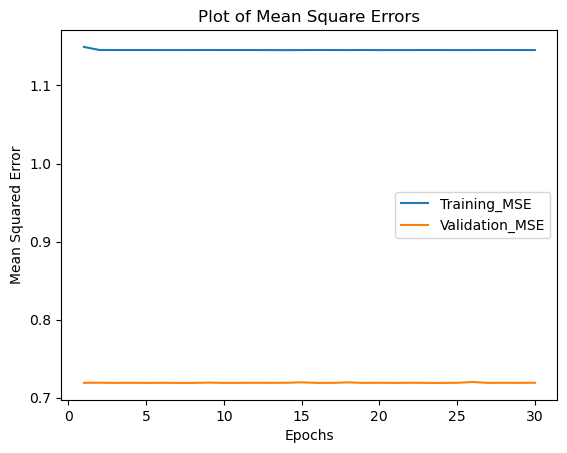

In [59]:
epochs=range(1,31)
train_mse = history.history["mean_squared_error"]
val_mse = history.history["val_mean_squared_error"]
plt.plot(epochs,train_mse,label="Training_MSE")
plt.plot(epochs,val_mse,label="Validation_MSE")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Plot of Mean Square Errors")
plt.legend()

### Prediction without textual information

In [60]:
# Dropping word_vectors from data
data_2=data.drop(text_sequence.columns,axis=1)
data_2.shape

(110121, 70)

In [61]:
# Splitting data into training, validation and testing set
x=data_2.drop("Total Engagement",axis=1)
y=data_2["Total Engagement"]

x_train, x_temp, y_train, y_temp = train_test_split(x,y,test_size=0.3,random_state=20)
x_val,x_test,y_val,y_test = train_test_split(x_temp,y_temp,test_size=1/3,random_state=3)

### Dense model

In [62]:
# Converting  [make] to int
x_train["make"] = x_train["make"].astype("int")
x_val["make"] = x_val["make"].astype("int")
x_test["make"] = x_test["make"].astype("int")

In [63]:
x_train.columns

Index(['year_0', 'year_1', 'year_2', 'year_3', 'year_4', 'year_5', 'year_6',
       'year_7', 'year_8', 'year_9', 'year_10', 'perform_rating_0',
       'perform_rating_1', 'perform_rating_2', 'perform_rating_3',
       'perform_rating_4', 'perform_rating_5', 'comfort_rating_0',
       'comfort_rating_1', 'comfort_rating_2', 'comfort_rating_3',
       'comfort_rating_4', 'comfort_rating_5', 'fuel_econ_rating_0',
       'fuel_econ_rating_1', 'fuel_econ_rating_2', 'fuel_econ_rating_3',
       'fuel_econ_rating_4', 'fuel_econ_rating_5', 'fun_rating_0',
       'fun_rating_1', 'fun_rating_2', 'fun_rating_3', 'fun_rating_4',
       'fun_rating_5', 'interior_rating_0', 'interior_rating_1',
       'interior_rating_2', 'interior_rating_3', 'interior_rating_4',
       'interior_rating_5', 'exterior_rating_0', 'exterior_rating_1',
       'exterior_rating_2', 'exterior_rating_3', 'exterior_rating_4',
       'exterior_rating_5', 'build_qual_rating_0', 'build_qual_rating_1',
       'build_qual_rating

In [67]:
# Defining Input layers
input_num = Input(shape=(len(numeric_and_processed_columns),))
input_cat = Input(shape=(1,))

# Embedding for categorical data
embedding_cat = Embedding(input_dim=55, output_dim=8)(input_cat)
flattened_cat = Flatten()(embedding_cat)

# Concatenate with other features
concatenated = Concatenate()([input_num, flattened_cat])

# Add Dense layers
dense_layer = Dense(32, activation='relu')(concatenated)
output = Dense(1, activation='linear')(dense_layer)

# Define the model
model = Model(inputs=[input_num, input_cat], outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanSquaredError()])

# Defining call backs
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model_2.keras', monitor='val_loss', save_best_only=True)

# Printing summary
model.summary()

# Train the model
history=model.fit([x_train[numeric_and_processed_columns], 
           x_train["make"]], y_train, 
           epochs=30, batch_size=10, 
           validation_data=([x_val[numeric_and_processed_columns],
                             x_val["make"]], y_val),
                           callbacks=[model_checkpoint])

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_6         │ (None, 1, 8)      │        440 │ input_layer_10[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_9       │ (None, 64)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_6 (Flatten) │ (None, 8)         │          0 │ embedding_6[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 72)        │          0 │ input_layer_9[0]… │
│ (Concatenate)       │                   │            │ flatten_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 32)        │      2,336 │ concatenate_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 1)         │         33 │ dense_6[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,809 (10.97 KB)

 Trainable params: 2,809 (10.97 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
7709/7709 ━━━━━━━━━━━━━━━━━━━━ 4s 456us/step - loss: 1.2056 - mean_squared_error: 1.2056 - val_loss: 0.8166 - val_mean_squared_error: 0.8166
Epoch 2/30
7709/7709 ━━━━━━━━━━━━━━━━━━━━ 3s 362us/step - loss: 0.8328 - mean_squared_error: 0.8328 - val_loss: 0.8228 - val_mean_squared_error: 0.8228
Epoch 3/30
7709/7709 ━━━━━━━━━━━━━━━━━━━━ 3s 363us/step - loss: 1.1208 - mean_squared_error: 1.1208 - val_loss: 0.8131 - val_mean_squared_error: 0.8131
Epoch 4/30
7709/7709 ━━━━━━━━━━━━━━━━━━━━ 3s 370us/step - loss: 0.9387 - mean_squared_error: 0.9387 - val_loss: 0.8129 - val_mean_squared_error: 0.8129
Epoch 5/30
7709/7709 ━━━━━━━━━━━━━━━━━━━━ 3s 360us/step - loss: 0.8874 - mean_squared_error: 0.8874 - val_loss: 0.8232 - val_mean_squared_error: 0.8232
Epoch 6/30
7709/7709 ━━━━━━━━━━━━━━━━━━━━ 3s 363us/step - loss: 1.1027 - mean_squared_error: 1.1027 - val_loss: 0.8186 - val_mean_squared_error: 0.8186
Epoch 7/30
7709/7709 ━━━━━━━━━━━━━━━━━━━━ 3s 363us/step - loss: 0.6622 - mean_squared_er

In [69]:
# Testing the model on testing set
loss, mse = model.evaluate([ 
           x_test[numeric_and_processed_columns], 
           x_test["make"]],y_test)

print("Loss :",round(loss,1))
print("MSE :",round(mse,1))

345/345 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step - loss: 0.9777 - mean_squared_error: 0.9777
Loss : 1.2
MSE : 1.2


**Plotting results**

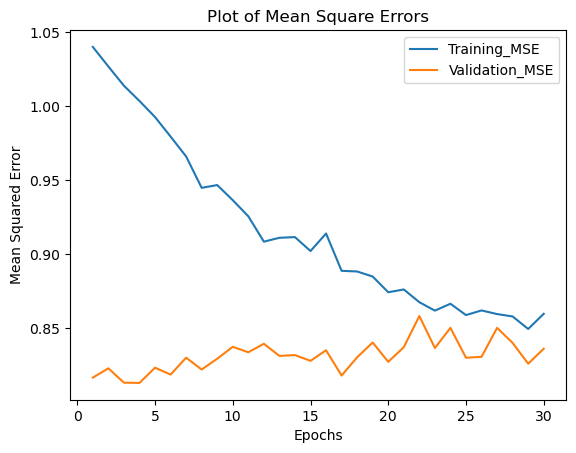

In [70]:
epochs=range(1,31)
train_mse = history.history["mean_squared_error"]
val_mse = history.history["val_mean_squared_error"]
plt.plot(epochs,train_mse,label="Training_MSE")
plt.plot(epochs,val_mse,label="Validation_MSE")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Plot of Mean Square Errors")
plt.legend()